#### Bibliotecas

In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
import graphviz

from IPython.display import SVG
import matplotlib.pyplot as plt

###DataSet

####Iris

In [ ]:
iris = datasets.load_iris()
data = iris.data
target = iris.target
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Tic-tac-toe

In [5]:
ttt = pd.read_csv('tic-tac-toe.data', sep=',', header=None)

#replace
ttt.replace(to_replace='x',value='1',inplace= True)
ttt.replace(to_replace='o',value='0',inplace= True)
ttt.replace(to_replace='b',value='2',inplace= True)
ttt.replace(to_replace='positive',value='1',inplace= True)
ttt.replace(to_replace='negative',value='0',inplace= True)
print(ttt)

data = ttt.iloc[:, 0:8].values
target = ttt.iloc[:, -1].values

     0  1  2  3  4  5  6  7  8  9
0    1  1  1  1  0  0  1  0  0  1
1    1  1  1  1  0  0  0  1  0  1
2    1  1  1  1  0  0  0  0  1  1
3    1  1  1  1  0  0  0  2  2  1
4    1  1  1  1  0  0  2  0  2  1
..  .. .. .. .. .. .. .. .. .. ..
953  0  1  1  1  0  0  0  1  1  0
954  0  1  0  1  1  0  1  0  1  0
955  0  1  0  1  0  1  1  0  1  0
956  0  1  0  0  1  1  1  0  1  0
957  0  0  1  1  1  0  0  1  1  0

[958 rows x 10 columns]


###Treino e Teste

In [27]:
#split
XTrain, XTest, YTrain, YTest = train_test_split(data, target, test_size = 0.75)

#classifcadores
cls_tree = tree.DecisionTreeClassifier(random_state=6, max_depth=4)
cls_rf = RandomForestClassifier(random_state=6)
cls_svm = SVC(random_state=6)

#Train
cls_tree.fit(XTrain, YTrain)
cls_rf.fit(XTrain, YTrain)
cls_svm.fit(XTrain, YTrain)

predict1 = cls_tree.predict(XTest)
predict2 = cls_rf.predict(XTest)
predict3 = cls_svm.predict(XTest)

print(accuracy_score(YTest,predict1))
print(accuracy_score(YTest,predict2))
print(accuracy_score(YTest,predict3))

0.7232267037552156
0.803894297635605
0.7552155771905424


###Variando parâmetros em DT

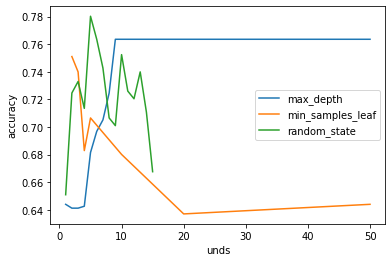

max_depth(8): 0.7635605006954103
min_samples_leaf(0): 0.7510431154381085
random_state(4): 0.780250347705146


In [ ]:
def get_modelsDT():
  models        = dict()
  models_depth  = dict()
  models_leaf   = dict()
  models_random = dict()

  d = [1,2,3,4,5,6,7,8,9,10,20,50]
  l = [2,3,4,5,10,20,50]
  r = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
 

  for i in d:
    models_depth[i] = tree.DecisionTreeClassifier(random_state = 6, max_depth=i, splitter ='random', criterion='entropy')

  for i in l:
    models_leaf[i] = tree.DecisionTreeClassifier(random_state = 6, min_samples_leaf=i, splitter ='random', criterion='entropy')  
  
  for i in r:
    models_random[i] = tree.DecisionTreeClassifier(random_state=i, splitter ='random', criterion='entropy')  


  models[0] = models_depth
  models[1] = models_leaf
  models[2] = models_random

  return models

modelsDT = get_modelsDT()
variations = dict()
accuracys = dict()

i=0
while (i < len(modelsDT)):
 vars = []
 accs = []
 for v, m in modelsDT[i].items():
   #print(i)
   m.fit(XTrain, YTrain)
   predict = m.predict(XTest)
   
   vars.append(v)
   accs.append(accuracy_score(YTest, predict))
   
 accuracys[i] = accs
 variations[i] = vars
 i+=1

#print(variations.keys())
#print(variations.values())
#print(variations.items())

#print(accuracys.values())
#print(accuracys.items())

plt.plot(variations[0],accuracys[0], label='max_depth')
plt.plot(variations[1],accuracys[1], label='min_samples_leaf')
plt.plot(variations[2],accuracys[2], label='random_state')
plt.legend()
plt.xlabel('unds')
plt.ylabel('accuracy')
plt.show()


v_paramDT = []
v_paramDT.append(max(accuracys[0]))
v_paramDT.append(max(accuracys[1]))
v_paramDT.append(max(accuracys[2]))

print('max_depth('        + str((variations[0])[(accuracys[0]).index(v_paramDT[0])]) + '): ' + str(v_paramDT[0]))
print('min_samples_leaf(' + str((variations[1])[(accuracys[1]).index(v_paramDT[1])]) + '): ' + str(v_paramDT[1]))
print('random_state('     + str((variations[2])[(accuracys[2]).index(v_paramDT[2])]) + '): ' + str(v_paramDT[2]))

### Trees

#### Iris

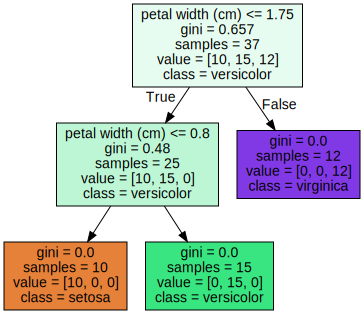

In [ ]:
graph = graphviz.Source(export_graphviz(cls_tree
                              ,out_file = None
                              ,feature_names = iris.feature_names
                              ,class_names = iris.target_names
                              ,impurity = True
                              ,filled = True))
display(SVG (graph.pipe(format ='svg')))

#### TTT

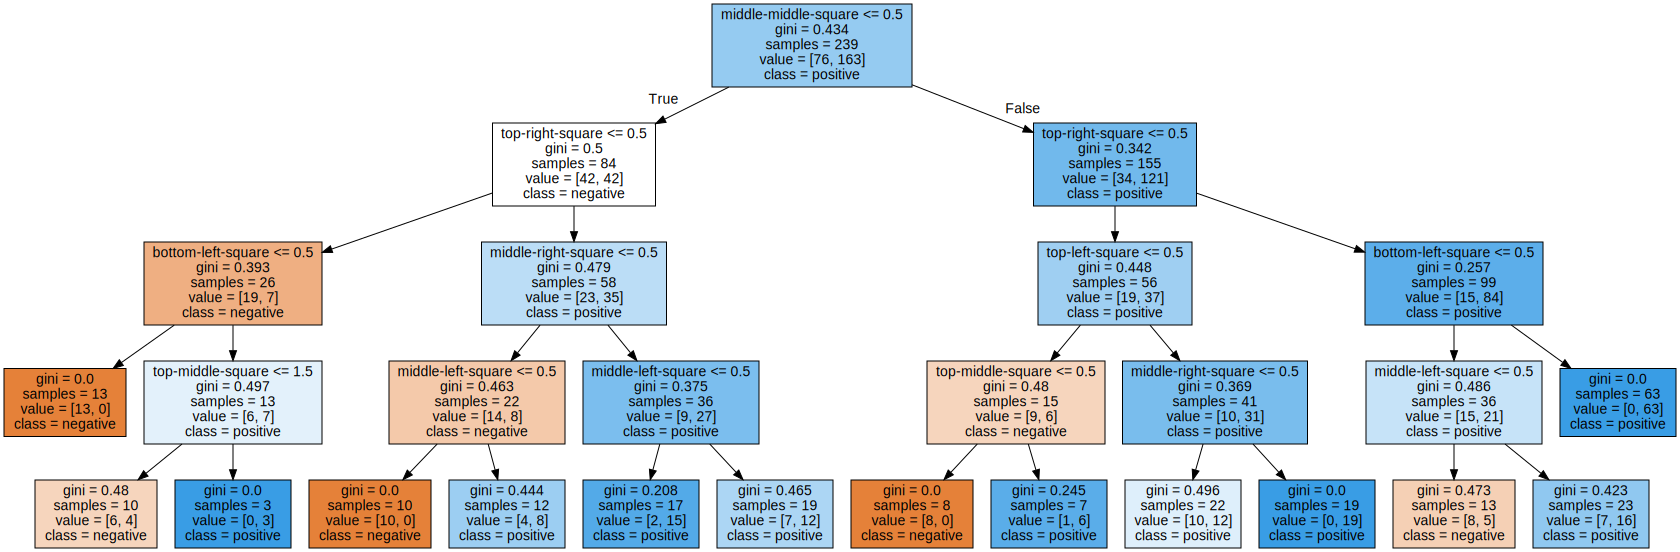

In [ ]:
dot = export_graphviz(cls_tree
                               ,out_file = None
                               ,feature_names = ['top-left-square'
                                                ,'top-middle-square'
                                                ,'top-right-square'
                                                ,'middle-left-square'
                                                ,'middle-middle-square'
                                                ,'middle-right-square'
                                                ,'bottom-left-square'
                                               # ,'bottom-middle-square'
                                                ,'bottom-right-square']
                               ,class_names = ['negative','positive']
                               ,impurity = True
                              ,filled = True)
graph = graphviz.Source(dot)
display (SVG (graph.pipe(format ='svg')))

In [ ]:
def get_modelsDT():
  models        = dict()
  models_depth  = dict()
  models_leaf   = dict()
  models_random = dict()

  d = [1,2,3,4,5,6,7,8,9,10 ,20,50]
  l = [2,3,4,5,10,20,50]
  r = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
 

  for i in d:
    models_depth[i] = tree.DecisionTreeClassifier(random_state = 6, max_depth=i, splitter ='random', criterion='entropy')

  for i in l:
    models_leaf[i] = tree.DecisionTreeClassifier(random_state = 6, min_samples_leaf=i, splitter ='random', criterion='entropy')  
  
  for i in r:
    models_random[i] = tree.DecisionTreeClassifier(random_state=i, splitter ='random', criterion='entropy')  


  models[0] = models_depth
  models[1] = models_leaf
  models[2] = models_random

  return models

modelsDT = get_modelsDT()
variations = dict()
accuracys = dict()

i=0
while (i < len(modelsDT)):
 vars = []
 accs = []
 for v, m in modelsDT[i].items():
   #print(i)
   m.fit(XTrain, YTrain)
   predict = m.predict(XTest)
   
   vars.append(v)
   accs.append(accuracy_score(YTest, predict))
   
 accuracys[i] = accs
 variations[i] = vars
 i+=1

#print(variations.keys())
#print(variations.values())
#print(variations.items())

#print(accuracys.values())
#print(accuracys.items())

plt.plot(variations[0],accuracys[0], label='max_depth')
plt.plot(variations[1],accuracys[1], label='min_samples_leaf')
plt.plot(variations[2],accuracys[2], label='random_state')
plt.legend()
plt.xlabel('unds')
plt.ylabel('accuracy')
plt.show()

print('max_depth('        + str((accuracys[0]).index(max((accuracys[0])))) + '): ' + str(max((accuracys[0]))))
print('min_samples_leaf(' + str((accuracys[1]).index(max((accuracys[1])))) + '): ' + str(max((accuracys[1]))))
print('random_state('     + str((accuracys[2]).index(max((accuracys[2])))) + '): ' + str(max((accuracys[2]))))
#print(max((accuracys[2])))


###Variando parâmetros em RF

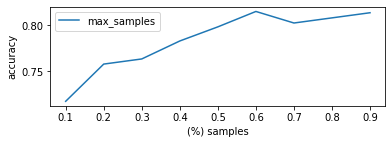

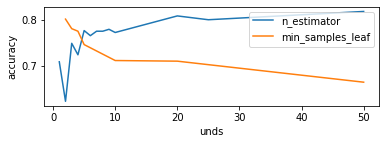

max_samples(5): 0.8150208623087621
n_estimator(12): 0.8191933240611962
min_samples_leaf(0): 0.8025034770514604


In [240]:
def get_modelsRF():
  models             = dict()
  models_samples     = dict()
  models_estimator   = dict()
  models_leaf        = dict()
  
  s = np.arange(0.1, 1, 0.1)
  e = [1,2,3,4,5,6,7,8,9,10,20,25,50]
  l = [2,3,4,5,10,20,50]

  for i in s:
    models_samples[i] = RandomForestClassifier(random_state = 6, max_samples=i, criterion='entropy')

  for i in e:
    models_estimator[i] = RandomForestClassifier(random_state = 6, n_estimators=i, criterion='entropy')

  for i in l:
    models_leaf[i] = RandomForestClassifier(random_state = 6, min_samples_leaf=i, criterion='entropy')  


  models[0] = models_samples
  models[1] = models_estimator
  models[2] = models_leaf
 

  return models

modelsRF = get_modelsRF()
variations = dict()
accuracys = dict()

i=0
while (i < len(modelsRF)):
 vars = []
 accs = []
 for v, m in modelsRF[i].items():
   #print(i)
   
   m.fit(XTrain, YTrain)
   predict = m.predict(XTest)
   
   vars.append(v)
   accs.append(accuracy_score(YTest, predict))
   
 accuracys[i] = accs
 variations[i] = vars
 i+=1


#plt.figure()
plt.subplot(211)
plt.plot(variations[0],accuracys[0], label='max_samples')
plt.legend()
plt.xlabel('(%) samples')
plt.ylabel('accuracy')
plt.show()

plt.subplot(211)
plt.plot(variations[1],accuracys[1], label='n_estimator')
plt.plot(variations[2],accuracys[2], label='min_samples_leaf')
plt.legend()
plt.xlabel('unds')
plt.ylabel('accuracy')
plt.show()


v_paramRF = []
v_paramRF.append(max(accuracys[0]))
v_paramRF.append(max(accuracys[1]))
v_paramRF.append(max(accuracys[2]))

print('max_samples('      + str((variations[0])[(accuracys[0]).index(v_paramRF[0])]) + '): ' + str(v_paramRF[0]))
print('n_estimator('      + str((variations[1])[(accuracys[1]).index(v_paramRF[1])]) + '): ' + str(v_paramRF[1]))
print('min_samples_leaf(' + str((variations[2])[(accuracys[2]).index(v_paramRF[2])]) + '): ' + str(v_paramRF[2]))

##### Importância das Features

middle-middle-square


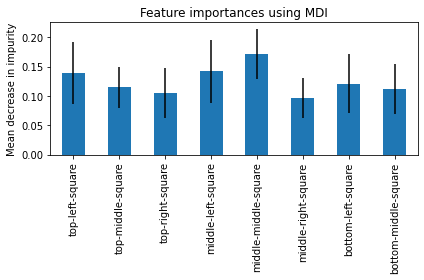

In [242]:
feature_names = ['top-left-square', 'top-middle-square','top-right-square'
                ,'middle-left-square','middle-middle-square','middle-right-square'
                ,'bottom-left-square','bottom-middle-square','bottom-right-square']
feature_names.remove('bottom-right-square')

importances = cls_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in cls_rf.estimators_], axis=0)

rf_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
rf_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

print(feature_names[importances.argmax()])

### Variando parâmetros SVM

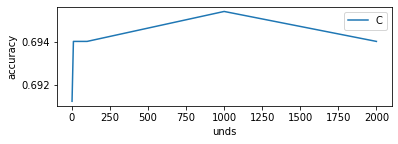

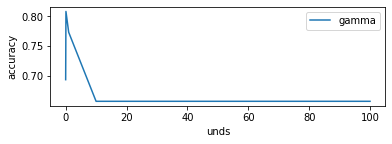

C(3): 0.6954102920723226
gamma(1): 0.808066759388039


In [263]:
def get_modelsSVM():
  models       = dict()
  models_C     = dict()
  models_gamma = dict()
    
  c = [1,10,100, 1000, 2000]
  g = [0.01,0.1, 1, 10, 100]

  for i in c:
    models_C[i] = SVC(random_state = 6, kernel='linear', C=i)

  for i in g:
    models_gamma[i] = SVC(random_state = 6, kernel='rbf', C=10, gamma=i)

  models[0] = models_C
  models[1] = models_gamma
 
  return models


modelsSVM = get_modelsSVM()
variations = dict()
accuracys = dict()

i=0
while (i < len(modelsSVM)):
 vars = []
 accs = []
 for v, m in modelsSVM[i].items():
   #print(i)
   m.fit(XTrain, YTrain)
   predict = m.predict(XTest)
   
   vars.append(v)
   accs.append(accuracy_score(YTest, predict))
   
 accuracys[i] = accs
 variations[i] = vars
 i+=1


#plt.figure()
plt.subplot(211)
plt.plot(variations[0],accuracys[0], label='C')
plt.legend()
plt.xlabel('unds')
plt.ylabel('accuracy')
plt.show()

plt.subplot(211)
plt.plot(variations[1],accuracys[1], label='gamma')
plt.legend()
plt.xlabel('unds')
plt.ylabel('accuracy')
plt.show()

v_paramSVM = []
v_paramSVM.append(max(accuracys[0]))
v_paramSVM.append(max(accuracys[1]))

print('C('     + str((variations[0])[(accuracys[0]).index(v_paramSVM[0])]) + '): ' + str(v_paramSVM[0]))
print('gamma(' + str((variations[1])[(accuracys[1]).index(v_paramSVM[1])]) + '): ' + str(v_paramSVM[1]))